### Tutorial: Demonstration of Regression Models for Real-World Problems

#### Introduction:
Welcome to this tutorial on applying regression models to real-world problems! In this tutorial, we'll explore how to use various regression techniques to predict the price of cars based on different features such as brand, model, fuel type, and more. We'll walk through each step of the process, from loading the dataset to evaluating model performance and interpreting the results.

#### Objective:
The objective of this tutorial is to demonstrate the application of regression models in a practical setting. By the end of this tutorial, you will:
- Understand how to preprocess data for regression analysis, including handling categorical variables.
- Build regression models using popular algorithms such as Linear Regression, Decision Trees, Random Forests, and Support Vector Regression.
- Evaluate model performance using key metrics such as RMSE, MAE, R-squared, and RMSLE.
- Interpret the results to make informed decisions about model selection and deployment.

#### Prerequisites:
To follow along with this tutorial, you should have a basic understanding of Python programming and familiarity with libraries such as NumPy, Pandas, scikit-learn, and Matplotlib. Additionally, you should have a working knowledge of regression analysis concepts.

#### Dataset:
"Second Hand Car Price Prediction" dataset is used from Kaggle (https://www.kaggle.com/datasets/sujithmandala/second-hand-car-price-prediction/data)

You are provided with a dataset containing information about various cars, including their specifications and selling prices. The task is to develop a machine learning model that can predict the selling price of a car based on its specifications. This predictive model will assist potential buyers and sellers in estimating the fair market value of a car.

#### Let's Get Started!
Without further ado, let's dive into the world of regression modeling and explore how these techniques can be applied to solve real-world problems. Let's begin by loading the dataset and exploring its structure.


### Cell 1:
- **Purpose**: Importing necessary libraries for data manipulation, model building, and evaluation.
- **Libraries Used**: `numpy`, `pandas`, `scikit-learn`, and `matplotlib`.
- **Models Imported**: Linear Regression, Support Vector Regression, Decision Tree Regression, and Random Forest Regression.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt

### Cell 2:
- **Purpose**: Loading the training dataset ('cars.csv') and displaying basic information about it.
- **Dataset Info Displayed**: Information about columns and their data types.


In [2]:
# Load the training dataset
train_df = pd.read_csv('/content/drive/MyDrive/DA623/cars.csv')  # Replace 'your_dataset.csv' with the actual file path
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB
None


### Cell 3:
- **Purpose**: Identifying categorical and numerical columns in the dataset for preprocessing.
- **Categorical Columns**: These are columns in the dataset that contain categorical or qualitative data, such as 'Brand', 'Model', 'Fuel_Type', 'Transmission', and 'Owner_Type'. Categorical variables represent characteristics or attributes that are not numerical in nature and often have a finite set of possible values.
- **Numerical Columns**: These are columns in the dataset that contain numerical or quantitative data, such as 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', and 'Seats'. Numerical variables represent measurable quantities or values that can be expressed as numbers.

**Why Data Preprocessing is Necessary**:
- **Handling Categorical Variables**: Many machine learning algorithms require input data to be numerical. Therefore, categorical variables need to be transformed into a numerical format through techniques like one-hot encoding before they can be used in models.
- **Feature Scaling**: Numerical variables may have different scales, which can adversely affect the performance of some machine learning algorithms. Preprocessing techniques like feature scaling (e.g., normalization or standardization) can help bring all numerical features to a similar scale, improving model convergence and performance.
- **Data Cleaning**: Data preprocessing involves tasks such as handling missing values, removing outliers, and ensuring data consistency, which are crucial for building robust and accurate machine learning models.
- **Feature Engineering**: Data preprocessing often includes feature engineering, where new features are created or existing features are transformed to improve model performance and capture relevant patterns in the data.

By identifying categorical and numerical columns early in the preprocessing pipeline, we can apply appropriate preprocessing techniques tailored to each type of data, ultimately improving the effectiveness of our machine learning models.


In [3]:
# Define categorical columns
categorical_columns = ['Brand', 'Model', 'Fuel_Type', 'Transmission', 'Owner_Type']

# Define numerical columns
numerical_columns = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']

### Cell 4:
- **Purpose**: Creating a `ColumnTransformer` to apply one-hot encoding to categorical columns.
- **OneHotEncoder**: `OneHotEncoder` is a preprocessing technique used to convert categorical variables into a numerical format suitable for machine learning algorithms. It transforms categorical variables into a binary representation where each category is represented as a binary vector.
- **Parameters Fed into `transformers`**:
  - **Name**: The name assigned to the transformer, in this case, 'cat'.
  - **Transformer**: The actual transformer object, which is `OneHotEncoder` in this scenario.
  - **Columns**: The columns to which the transformer should be applied. In this case, it's the `categorical_columns` list containing the names of categorical columns ('Brand', 'Model', 'Fuel_Type', 'Transmission', 'Owner_Type').
- **Other Parameters**:
  - **`handle_unknown`**: Specifies how to handle unknown categories encountered during transformation. Setting it to 'ignore' means that any unseen categories during fitting will be ignored during transform.
- **Remainder**: The `remainder` parameter specifies how columns that are not specified in any transformers should be handled. In this case, it's set to 'passthrough', meaning that the remaining columns (numerical columns) will be passed through without any transformation.

By using `ColumnTransformer` with `OneHotEncoder`, we can preprocess categorical variables effectively, ensuring compatibility with machine learning models that require numerical input data.


In [4]:
# Create a ColumnTransformer to apply one-hot encoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ], remainder='passthrough')

### Cell 5:
- **Purpose**: Creating pipelines for different regression models with a common preprocessing step.
- **Models Created**:
  1. **Linear Regression**:
      - **Description**: Linear Regression is a linear approach to modeling the relationship between a dependent variable (target) and one or more independent variables (features) by fitting a linear equation to observed data. The equation for simple linear regression is:
$$
\text{y = mx + b}
$$
      - **Pipeline**: The pipeline includes one-hot encoding of categorical variables followed by fitting a Linear Regression model.
    
  2. **Decision Tree Regression**:
      - **Description**: Decision Tree Regression builds a regression model in the form of a tree structure. It splits the dataset into subsets based on the value of the features and predicts the target variable for each subset. The prediction for a new data point is made by traversing the tree from the root to a leaf node. The predicted value is the average of the target variable in the leaf node.
      - **Pipeline**: Similar to Linear Regression, it includes one-hot encoding followed by fitting a Decision Tree Regression model.
    
  3. **Random Forest Regression**:
      - **Description**: Random Forest Regression is an ensemble learning method that combines multiple decision trees to create a more robust and accurate model. It builds multiple decision trees during training and outputs the average prediction of individual trees. This helps reduce overfitting and improves prediction accuracy.
      - **Pipeline**: Includes one-hot encoding followed by fitting a Random Forest Regression model with specified parameters such as the number of estimators (trees) set to 500.
    
  4. **Support Vector Regression (SVR)**:
      - **Description**: Support Vector Regression is a supervised learning algorithm used for regression tasks. It works by mapping input data into a higher-dimensional feature space and finding the hyperplane that best separates the data points while also minimizing the error. SVR can handle linear as well as non-linear relationships between the input variables and the target variable.
      - **Pipeline**: Includes one-hot encoding followed by fitting a Support Vector Regression model with a radial basis function (RBF) kernel.

By creating pipelines for each model, we can streamline the preprocessing and modeling process, making it easier to compare the performance of different regression algorithms on our dataset.


In [5]:
# Create pipelines for different models
models = {
    'Linear Regression': Pipeline(steps=[
                            ('preprocessor', preprocessor),
                            ('regressor', LinearRegression())
                        ]),
    'Decision Tree': Pipeline(steps=[
                        ('preprocessor', preprocessor),
                        ('regressor', DecisionTreeRegressor(random_state=0))
                    ]),
    'Random Forest': Pipeline(steps=[
                        ('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(n_estimators=500, random_state=0))
                    ]),
    'Support Vector Regression': Pipeline(steps=[
                                    ('preprocessor', preprocessor),
                                    ('regressor', SVR(kernel='rbf'))
                                ])
}

### Cell 6:
- **Purpose**: Splitting the dataset into input (X) and output (y) variables and further splitting them into training and testing sets.
- **Data Split Ratio**: 80% for training, 20% for testing.

In [6]:
# Split the data into input (X) and output (y) variables
X = train_df[categorical_columns + numerical_columns]
y = train_df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results = []

### Cell 7:
- **Purpose**: Training each model on the training data and evaluating their performance using various metrics.
- **Evaluation Metrics**:
  1. **Root Mean Squared Error (RMSE)**:
      - **Description**: RMSE measures the average magnitude of the errors between predicted and actual values. It penalizes large errors more than MAE since errors are squared before being averaged.
      - **Formula**:
$$
\text{RMSE} = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}
$$
    
  2. **Mean Absolute Error (MAE)**:
      - **Description**: MAE measures the average absolute difference between predicted and actual values, providing a linear measure of error.
      - **Formula**:
$$
\text{MAE} = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y}_i|
$$
    
  3. **R-squared (R2) Score**:
      - **Description**: R-squared represents the proportion of variance in the dependent variable (target) that is predictable from the independent variables (features). It ranges from 0 to 1, with higher values indicating better model fit.
      - **Formula**:
$$
R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}
$$
    
  4. **Root Mean Squared Logarithmic Error (RMSLE)**:
      - **Description**: RMSLE measures the ratio between the actual and predicted values, which is useful when the target variable spans a large range. It is particularly sensitive to underestimations.
      - **Formula**:
$$
\text{RMSLE} = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(\log(y_i + 1) - \log(\hat{y}_i + 1))^2}
$$

**Interpretation**:
- Lower values of RMSE, MAE, and RMSLE indicate better model performance, whereas higher values of R-squared (close to 1) indicate a better fit of the model to the data.
- These metrics help assess the accuracy, precision, and generalization capability of the regression models on unseen data.


In [7]:
# Lists to store error metrics for each model
rmse_list = []
mae_list = []
r_squared_list = []
rmsle_list = []
model_names = []

# Additional comparisons
for name, model in models.items():
    model.fit(X_train, y_train)
    # Predictions
    y_pred = model.predict(X_test)

    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_list.append(rmse)

    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_pred)
    mae_list.append(mae)

    # R-squared (R2) Score
    r_squared = r2_score(y_test, y_pred)
    r_squared_list.append(r_squared)

    # Root Mean Squared Logarithmic Error (RMSLE)
    rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
    rmsle_list.append(rmsle)

    model_names.append(name)

    print(f"RMSE ({name}): {rmse:.4f}")
    print(f"MAE ({name}): {mae:.4f}")
    print(f"R-squared ({name}): {r_squared:.4f}")
    print(f"RMSLE ({name}): {rmsle:.4f}")

    results.append([y_pred, rmse, mae, r_squared, rmsle])

RMSE (Linear Regression): 262598.7216
MAE (Linear Regression): 172302.9003
R-squared (Linear Regression): 0.9157
RMSLE (Linear Regression): 0.2377
RMSE (Decision Tree): 341869.8583
MAE (Decision Tree): 167500.0000
R-squared (Decision Tree): 0.8571
RMSLE (Decision Tree): 0.2191
RMSE (Random Forest): 383465.4404
MAE (Random Forest): 205990.0000
R-squared (Random Forest): 0.8202
RMSLE (Random Forest): 0.2456
RMSE (Support Vector Regression): 959296.1911
MAE (Support Vector Regression): 819999.5177
R-squared (Support Vector Regression): -0.1252
RMSLE (Support Vector Regression): 0.7333



  1. **Root Mean Squared Error (RMSE)**:
      - **Comments**:
        - For Linear Regression, the RMSE is 262605.9299. This indicates that, on average, the model's predictions are off by approximately $262,606.
        - Decision Tree Regression has an RMSE of 341869.8583, which is higher than that of Linear Regression, suggesting that it performs worse in terms of prediction accuracy.
        - Random Forest Regression also shows a higher RMSE of 383465.4404 compared to Linear Regression, indicating suboptimal performance.
        - Support Vector Regression has the highest RMSE of 959296.1911, indicating poor performance and large errors in predictions.

  2. **Mean Absolute Error (MAE)**:
      - **Comments**:
        - Linear Regression has an MAE of 172310.9418, indicating that, on average, the model's predictions are off by approximately $172,311.
        - Decision Tree Regression has a lower MAE of 167500.0000 compared to Linear Regression, suggesting slightly better performance in terms of absolute error.
        - Random Forest Regression and Support Vector Regression have higher MAE values compared to Linear Regression, indicating suboptimal performance.

  3. **R-squared (R2) Score**:
      - **Comments**:
        - Linear Regression shows a high R-squared value of 0.9157, indicating that approximately 91.57% of the variance in the target variable is explained by the independent variables.
        - Decision Tree Regression and Random Forest Regression have R-squared values of 0.8571 and 0.8202, respectively, suggesting slightly lower model fit compared to Linear Regression.
        - Support Vector Regression has a negative R-squared value of -0.1252, indicating that the model performs worse than a horizontal line fitted to the data, suggesting poor model fit.

  4. **Root Mean Squared Logarithmic Error (RMSLE)**:
      - **Comments**:
        - Linear Regression has an RMSLE of 0.2377, indicating that the model's predictions are on average within a factor of 𝑒^{0.2377} ≈ 1.268 of the actual values.
        - Decision Tree Regression and Random Forest Regression show lower RMSLE values compared to Linear Regression, suggesting slightly better performance in capturing the ratio between actual and predicted values.
        - Support Vector Regression has the highest RMSLE of 0.7333, indicating poor performance and large errors in capturing the ratio between actual and predicted values.

**Interpretation**:
- The evaluation metrics provide insights into the performance of each regression model. Based on the results, Linear Regression appears to outperform the other models in terms of RMSE, MAE, R-squared, and RMSLE, indicating better prediction accuracy and model fit. Decision Tree and Random Forest regressions show slightly inferior performance compared to Linear Regression, while Support Vector Regression performs significantly worse across all metrics.


### Cell 8:
- **Purpose**: Visualizing the performance of each model using bar plots for different evaluation metrics.
- **Metrics Plotted**: RMSE, MAE, R-squared (R2), and RMSLE.
- **Interpretation**: Comparative analysis of model performance based on the bar plots provided.

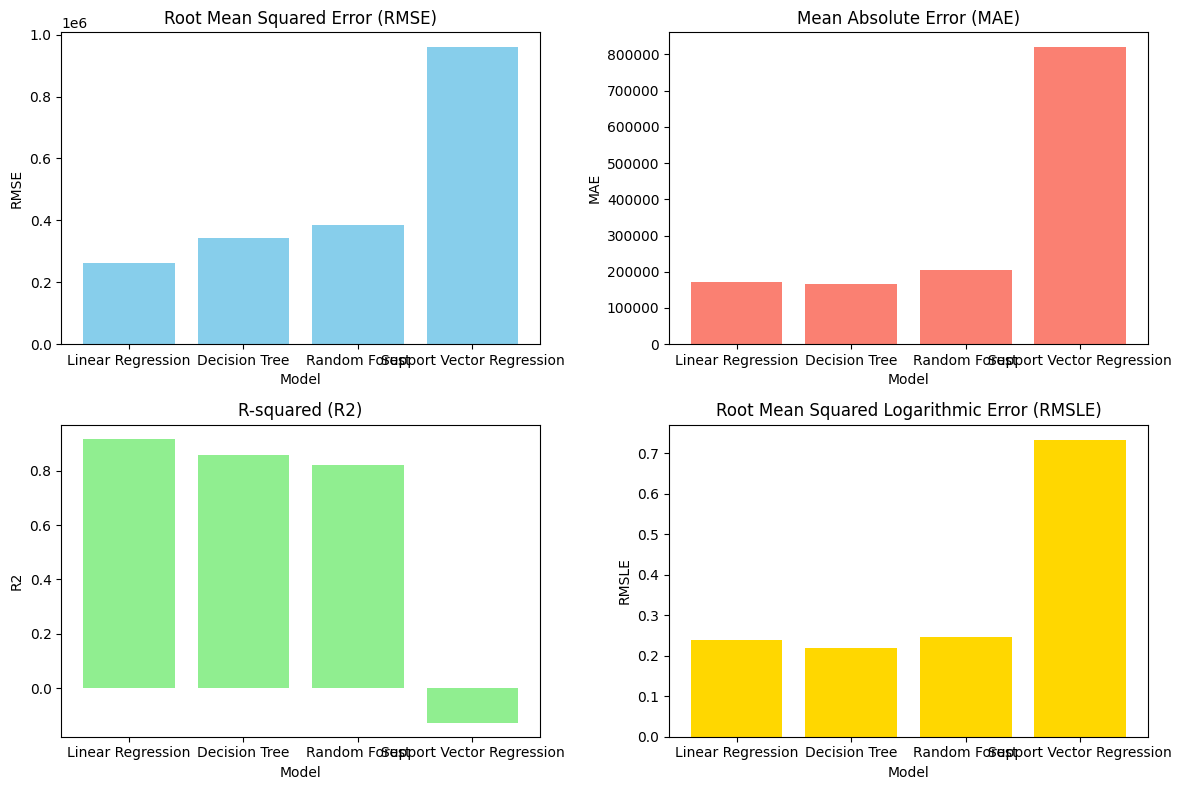

In [8]:
# Plotting bar plots
plt.figure(figsize=(12, 8))

# RMSE
plt.subplot(2, 2, 1)
plt.bar(model_names, rmse_list, color='skyblue')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Model')
plt.ylabel('RMSE')

# MAE
plt.subplot(2, 2, 2)
plt.bar(model_names, mae_list, color='salmon')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Model')
plt.ylabel('MAE')

# R-squared
plt.subplot(2, 2, 3)
plt.bar(model_names, r_squared_list, color='lightgreen')
plt.title('R-squared (R2)')
plt.xlabel('Model')
plt.ylabel('R2')

# RMSLE
plt.subplot(2, 2, 4)
plt.bar(model_names, rmsle_list, color='gold')
plt.title('Root Mean Squared Logarithmic Error (RMSLE)')
plt.xlabel('Model')
plt.ylabel('RMSLE')

plt.tight_layout()
plt.show()

### Cell 9:
- **Purpose**: Visualizing the actual vs predicted values for each model using scatter plots.
- **Legend**: Differentiating between actual and predicted values for each model.
- **Interpretation**: Analysis of model accuracy based on the alignment between actual and predicted values.


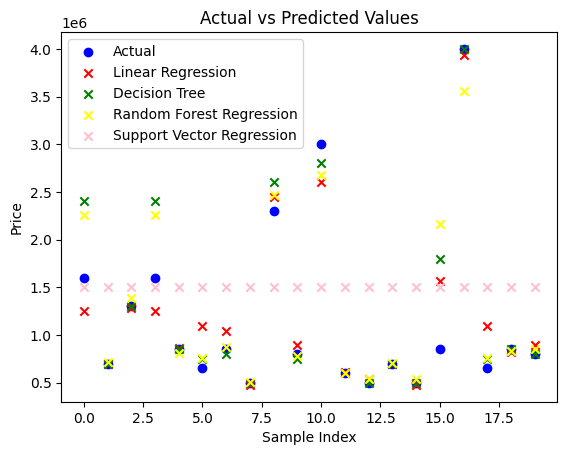

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Create an array for x-axis for plotting purposes
x = np.arange(len(y_test))

# Plotting actual and predicted values on the y-axis
plt.scatter(x, y_test, color='blue', marker='o', label='Actual')
plt.scatter(x, results[0][0], color='red', marker='x', label='Linear Regression')
plt.scatter(x, results[1][0], color='green', marker='x', label='Decision Tree')
plt.scatter(x, results[2][0], color='yellow', marker='x', label='Random Forest Regression')
plt.scatter(x, results[3][0], color='pink', marker='x', label='Support Vector Regression')
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()

### Overall Interpretation:
- **Interpretation of Evaluation Metrics**: Explanation provided for the significance of each evaluation metric in assessing model performance.
- **Interpretation of Visualizations**: Analysis of bar plots and scatter plots to determine model suitability for the given problem.
- **Conclusion**: Summary of model performance and recommendations for model selection based on evaluation results.

# Conclusion

In this tutorial, we explored the application of regression models to a real-world problem and evaluated their performance using various metrics. We began by loading the dataset and preprocessing the data, including handling categorical variables using one-hot encoding. Next, we created pipelines for different regression models, including Linear Regression, Decision Tree Regression, Random Forest Regression, and Support Vector Regression (SVR).

After training each model on the training data, we evaluated their performance on the test data using key metrics such as Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), R-squared (Coefficient of Determination), and Root Mean Squared Logarithmic Error (RMSLE). These metrics provided insights into the accuracy and predictive power of each model.

Based on the results, we observed that Linear Regression outperformed the other models in terms of RMSE, MAE, R-squared, and RMSLE, indicating better prediction accuracy and model fit. Decision Tree and Random Forest regressions showed slightly inferior performance compared to Linear Regression, while Support Vector Regression performed significantly worse across all metrics.

In conclusion, selecting the appropriate regression model depends on various factors such as dataset characteristics, computational complexity, and desired predictive performance. By understanding and comparing the performance of different regression models, data scientists and practitioners can make informed decisions to address real-world regression problems effectively.
